# Ford GoBike System Data Exploration
## by Sooyeon Won 

## Preliminary Wrangling

> This analysis explores the datasets  about individual rides made in a bike-sharing system. The datasets, collected from 2018 to 2019, contain mobilities information for more than 4 million datapoints. 

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

> Originally, monthly datasets are provided. By joining all the monthly datasets, I used yearly data in this analysis. You can check the process of joining monthly datasets in the previous Notebook ('01_Data_Wrangling.ipynb'). After loading the annual datasets individually, they are appended each other for the sake of simplicity. 

In [2]:
# Load in the datasets into a pandas dataframe, print statistics
bike_2018 =  pd.read_csv('bike_2018.csv')
bike_2019 =  pd.read_csv('bike_2019.csv')

C:\Users\wonso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Label each dataset before appending.
bike_2018['Year'] = '2018' 
bike_2019['Year'] = '2019'
bike_df = bike_2018.append(bike_2019, ignore_index=True)

In [4]:
bike_2018.info(), bike_2019.info() 
# Only one column ('rental_access_method') is contained in 2019 dataset. The rest of features are all the same.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  Year                     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 213.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------               

(None, None)

In [5]:
bike_df.shape # There are ca. 4,37 millions of datapoints and 16 features.

(4370704, 16)

In [6]:
bike_df.info() # Using the method ".info()", we can figure out the information contained in the appended dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  Year                     object 
 15  rental_access_method     object 
dtypes: float64(6), int64(2), object(8)
memory usage: 533.5+ MB


In [7]:
print('The earliest date of datapoints: ', bike_df['start_time'].min())
print('The latest date of datapoints: ', bike_df['start_time'].max())
print('Total numbere of datapoints: ', bike_df.shape[0])
# More than 4.3 million datapoints are gathered from 2018-01-01 to 2019-12-31.

The earliest date of datapoints:  2018-01-01 00:01:53.8470
The latest date of datapoints:  2019-12-31 23:59:41
Total numbere of datapoints:  4370704


### The Structure of the Final Dateset 

> The final dataset contains approximately 4.37 million mobility records and 16 features. <br>
  The datapoints are collected from 2018-01-01 to 2019-12-31. 

### The Main Features of Interest in the Dateset

> The 16 features can be classified into 4 categories: 
- **Time information**: Riding Duration(in secs), Start and End time, Year
- **Place information**: Start station (ID, Name, Latitude, Longitude), End station (ID, Name, Latitude, Longitude)
- **User information**: User types, Completeness of trips (bike_share_for_all_trip), Access Type(rental_access_method)
- **Other information**: Bike ID
    
> The features about user information are all categorical. 
- **user_types**: 'Subscriber', 'Customer' indicate multi-times, one-time users, respectively. 
- **bike_share_for_all_trip**: True or False 
- **rental_access_method**: via Apps or via Clipper (This feature is contained in 2019 dataset only.)


> The columns unnecessary for this analysis are dropped before exploration. The unuseful columns are station IDs, and names, and Bike IDs.

### The Main Topics of Investigation with Supporting Features 

> Using this data, I mainly focus on the moving patterns of rental bike users. I also compare the patterns based on the user types. 
More specifically, I tried to find the answers for the following questions through out this analysis.: 

1. General Patterns over the Years
> - **How long do individual trips take? (Duration of Trips) <br>**
    The support features: Riding Duration, Year
> - **How far do the users ride a bike? (Distance of Trips) <br>** 
    The support features: The Latitude, Longitude of Start and End station
> - **When is the trips with rental bikes popular(Popular time of a day, day of a week, month of a year)? <br>**
    The support features: Start and End time

2. Pattern Comparisons based on User-Type 
> - **How often do the different types of users rent a bike? <br>**
    The support features: User types    
> - **How often do the different types of users, access to the rental system? <br>**
    The support features: User types, rental_access_method

3. Pattern Comparisons based on User-Type with various Time Dimensions
> - **How different is the average trip duration between subscribers or customers? <br>**
    The support features: Riding Duration, User types
> - **How different are the average trip distances between difference user types?  <br>**
    The support features: The Latitude, Longitude of Start and End station, User type
> - **How different is the most popular time between two user types over the years? <br>**
    The support features: Start and End time, Year
    

In [8]:
# Adjust the datatype of several features; 
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

# Drop unnecessary features for this analysis 
unnecessary_cols = ['start_station_id', 'end_station_id', 'bike_id', 'end_station_name', 'start_station_name']
bike_df.drop(unnecessary_cols, axis = 1, inplace = True)

## Univariate Exploration

> I start with looking at the overall distribution of trip durations.

### 1. The Distribution of Trip Durations

In [9]:
bike_df.duration_sec.describe() # From the max value, we can guess that there are outliers. 

count    4.370704e+06
mean     8.288215e+02
std      2.152483e+03
min      6.000000e+01
25%      3.550000e+02
50%      5.640000e+02
75%      8.810000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [10]:
# Since we have very large dataset, I decided to drop the outliers by taking 99 percentile of the data. 
quantile_99= bike_df.duration_sec.quantile(.99)
quantile_99
#The trip duration in the 99th percentile is 4684 seconds, approximately 1 hour and 18 minutes. 

4684.0

In [11]:
bike_df= bike_df.query('duration_sec < 4684')

In [12]:
bike_df.duration_sec.describe()

count    4.326994e+06
mean     6.956324e+02
std      5.318051e+02
min      6.000000e+01
25%      3.530000e+02
50%      5.600000e+02
75%      8.670000e+02
max      4.683000e+03
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'Overall Trip Duration (in second)')

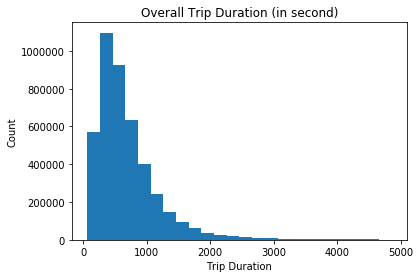

In [13]:
bins_edge =np.arange(60,bike_df['duration_sec'].max()+200, 200)
plt.hist(data = bike_df, x =  'duration_sec', bins = bins_edge );
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.title('Overall Trip Duration (in second)')

> **Findings:** The trip duration histogram is higher skewewd to the right. Users take the bikes about 695 seconds (approximately 11.58 minutes) on average. I also found out that 75% of users take their trips with rental bikes less than 897 seconds (approximately 15 minutes). Next, I investgated the distribution of trip distances fpr each rental bike record.

### 2. The Distribution of Trip Distance

In [14]:
# To calculate the trip distance, I set a function as follow:
import math
def distance_cal(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Reference: "https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows"
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

        a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [15]:
lat_start = bike_df.start_station_latitude
lon_start = bike_df.start_station_longitude 
lat_end = bike_df.end_station_latitude     
lon_end = bike_df.end_station_longitude
# Using the latitude and longitude of each station, I calculate the distance of each trip. 
bike_df['distance'] = distance_cal(lat_start, lon_start, lat_end, lon_end)

In [16]:
bike_df.distance.describe() # From the max value, it seems that outliers exist as well. 

count    4.326994e+06
mean     1.811059e+00
std      4.478416e+01
min      0.000000e+00
25%      9.022422e-01
50%      1.413548e+00
75%      2.171534e+00
max      1.279835e+04
Name: distance, dtype: float64

In [17]:
# By taking 99 percentile of the data, I get rid of the outliers.
dist_quantile_99 = bike_df.distance.quantile(.99)
dist_quantile_99

4.9696435862433175

In [18]:
bike_df = bike_df.query('distance < 4.9696')

Text(0.5, 1.0, 'Overall Trip Distiance Duration')

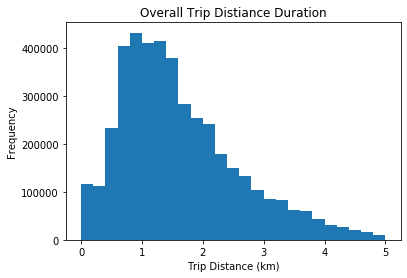

In [19]:
bins_dist =np.arange(0, bike_df['distance'].max()+0.2, 0.2)
plt.hist(data = bike_df, x =  'distance', bins = bins_dist );
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.title('Overall Trip Distiance Duration')

In [20]:
bike_df.distance.describe()

count    4.283709e+06
mean     1.611877e+00
std      9.702535e-01
min      0.000000e+00
25%      8.980624e-01
50%      1.406149e+00
75%      2.143716e+00
max      4.968373e+00
Name: distance, dtype: float64

In [21]:
zero_dist = bike_df.query('distance < 0.1') # A new dataframe wiht zero distance data points
zero_dist.shape[0] / bike_df.shape[0] # Zero distance data points consist of 2.5% of whole users

0.0254804889874639

In [22]:
zero_dist.duration_sec.describe() # We should note that Zero-distance users do not necessarily mean they did not use the bikes.

count    109151.000000
mean       1241.017407
std        1118.997560
min          60.000000
25%         244.000000
50%         961.000000
75%        1887.000000
max        4683.000000
Name: duration_sec, dtype: float64

> **Findings:** The histogram of the trip distance is also skewed to the right. The distance of each trip is about 1.61km on average. 75 percent of people travel less than 2.14 km. One interesting point from the histogram is that there are some trips recorded as 0 km. However their trip duration is not zero. This could indicate that the users bring back their bikes to the station where they started their trips. 
In the next section, I analysed the distribution of trip records based on different time dimensions.

### 3. The Number of Renting Bikes in each Year /  in each Month  /  in each Weekday /  in each Hour 

#### 3-1 The number of rental bike records in each year 

Text(0.5, 1.0, 'User Distribution in each Year')

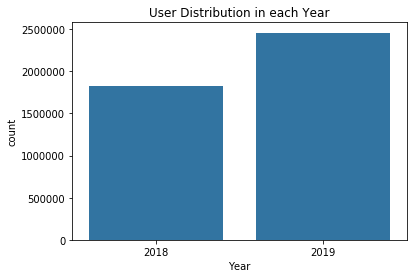

In [23]:
base_color =sns.color_palette()[0]
sns.countplot(data = bike_df, x = 'Year', color = base_color)
plt.ylabel('count')
plt.title('User Distribution in each Year')

> **Findings:** The total number of uses increased over the years.

#### 3-2 The number of rental bike records in each month

Text(0.5, 1.0, 'User Distribution in each Month')

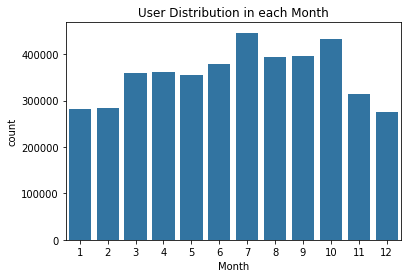

In [24]:
bike_df['Month'] = bike_df['start_time'].dt.month
sns.countplot(data = bike_df, x = 'Month', color = base_color)
plt.title('User Distribution in each Month')

> **Findings:** The number of rental times are changing in each month. The most popular months are from July to October. On the other hand, users are less likely to take a trip with rental bikes from November to February, when getting cold.

#### 3-3 The number of rental bike records in each weekday

In [25]:
bike_df['weekday'] = bike_df.start_time.dt.day_name(); # Generate a column 'weekday' extracted from start_time

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

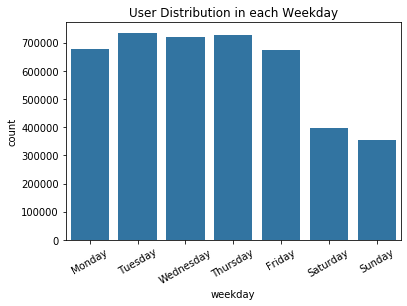

In [26]:
sns.countplot(order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], data = bike_df, x = 'weekday', color = base_color)
plt.title('User Distribution in each Weekday')
plt.xticks(rotation =30)

> **Findings:** The number of uses are different between weekdays and weekend. The graph shows that rental bikes are more popular on weekdays than weekends. For this reason, we can imply that the majoriy of bike users could be commuters.

#### 3-4 The number of rental bike records in each hour

In [27]:
bike_df['hour'] = bike_df['start_time'].dt.hour # Generate a column 'Hour' extracted from start_time

Text(0.5, 1.0, 'User Distribution in each hour')

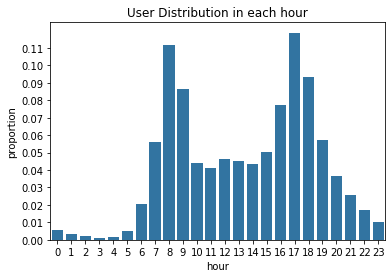

In [28]:
n_points = bike_df.shape[0]
max_count = bike_df.hour.value_counts().max()
max_prop = max_count/n_points 

tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
#base_color = sb.color_palette()[0]
sns.countplot(data = bike_df, x = 'hour', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.title('User Distribution in each hour')

> **Findings:** As earlier expected, more people use bikes during the rush hours. The hourly plotted histrogram is bimodel. From 7:30 to 8:30 and from 16:30 to 17:30 are the two time zones showing high demands in a day. Thus, I become more confident with the fact that most users take the rental bikes with the purpose of commuting. So far, we have investigated the distribution of users based on various time dimensions, Next, I analysed the type of users. What percentage of the whole users are subscribers?

### 4. The Proportion of User Types

Text(0, 0.5, 'proportion')

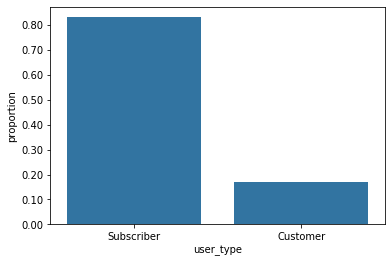

In [29]:
n_points = bike_df.shape[0]
max_count = bike_df.user_type.value_counts().max()
max_prop = max_count/n_points 

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sns.color_palette()[0]
sns.countplot(data = bike_df, x = 'user_type', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

> **Findings:** There are two types of users in the datasets. The users can become a "Subscriber" by paying monthly or yearly membership fees. As a Ford GoBike member, users can  receive unlimited 45-minute trips. For more than 45 minutes at a time, users can keep their trip with an extra charge. On the ther hand, users can also enjoy the bike trips by paying either for each trip, or for a day. Such users (without membership) are categorized as "Customer". It turns out that more than 80% of rental bike records are made by subscribers. 


### Summarize the insights from the Features of Interest 

> - Firstly, the distribution of _'Trip Duration'_ is highly skewed to the right. The majority of people (75 percentile) use a rental bike less than 15 minutes. Is this pattern consistent in both years? We will figure it out in the next section. 
> - For the distance of each trip _'Trip Distance'_, I calculated the distance using latitude and longitude of start and end stations. The distribution of 'Trip Distance' is also skewed to the right. The average trip distance is 1.6 km. Most people (75 percentile) ride a rental bike within 2.14km. Interestingly, there are several data points whose trip distance is calculated zero, but their trip durations are not close to zero. This implies that some users bring back their rental bikes to the place where they initially rent it out.
> - Comparing to 2018, total number of rental bike usages in 2019 are increased. This could means that people get familiar with the rental bike systems. Also this could indicate that people are getting notice the convenience of the rental bikes. Either way, Ford GoBike shows promising business in 2019. 
> - People prefer to rent a bike from July to October, comparing to other months. However, the users are less likely to rent from November to February. Higher demands are shown on weekdays, rather than weekends. 
> - People are likely to rent a bike during 7:30 - 8:30 and 16:30 - 17:30. These two time zones are representing rush hours of a day. So, users prefer to use the rental bikes during rush hours. 

### Several Issues of the Dataset

> **Data Type:** To analyse the distribution of trip records based on the various time dimensions, I changed the data type of start_time, end_time to datetime, using the to_datetime method of pandas. Then, the Month, Weekday, and Hour information are individually extracted. 
    
> **Outliers:** As mentioned earlier, the columns. 'duration_sec' and 'distance' own several outliers. By taking up to 99 percentile of the datapoints, I removed the outliers. Because our dataset contains a huge amount of data points, removing the 1 percent of whole data points, do not heavily affect to the findings. 

> **Missing Values:** The columns start_station_name/id and end_station_name/id contain missing values. But they are not useful for this analysis.

## Bivariate Exploration

>  In this section, I developed my anaysis in the previous section further. 
- 1. The distribution of trip durations/ trip distance in each year.
- 2. The number of times that different types of users rent a bike in each year.
- 3. The comparison of access methods between the two types of users. 
- 4. The comparison of trip patterns between subscribers and customers in terms of average trip duration and trip distance.
- 5. The relationship between trip duration and trip distance.

In [30]:
# Plotting with whole datapoints takes some time. Thus, I plotted using the sample of bike_df in some cases. 
bike_sample = bike_df.sample(n=2000, random_state=42)

### 1. The Distribution of Trip Durations/ Trip Distance in each Year

#### 1-1 The distribution of trip durations in each year

Text(0.5, 1, 'Trip Duration in Each Year (in second)')

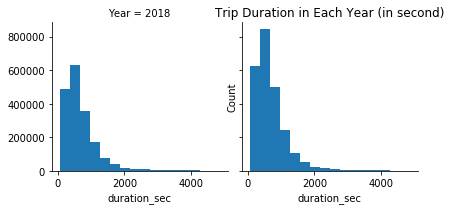

In [31]:
g =sns.FacetGrid(data = bike_df, col = 'Year' )
bins_edges =np.arange(60,bike_df['duration_sec'].max()+300, 300)
g.map(plt.hist, 'duration_sec',bins =bins_edges ); 
plt.ylabel('Count')
plt.title('Trip Duration in Each Year (in second)')

#### 1-2 The distribution of trip distance in each year

Text(0.5, 1, 'Trip distance in Each Year (in km)')

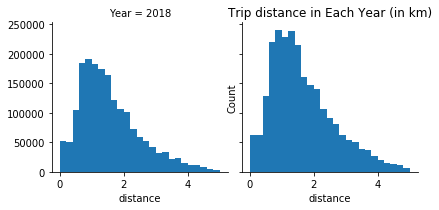

In [32]:
g =sns.FacetGrid(data = bike_df, col = 'Year' )
bins_edges =np.arange(0,bike_df['distance'].max()+0.2, 0.2)
g.map(plt.hist, 'distance',bins =bins_edges ); 
plt.ylabel('Count')
plt.title('Trip distance in Each Year (in km)')

> **Findings:** The distribution of the trip durations/ trip distance in both years are very similar. They are all skewed to the right. The majority of people use the rental bike less than 2000 seconds, ride the bike less than 4 kilometers. From the plots, we can also clearly notice that total number of uses in 2019 is larger than in the previous year. Next, I investigated the number of each user type in both years. 

### 2. The Number of Rents in each year based on User Types

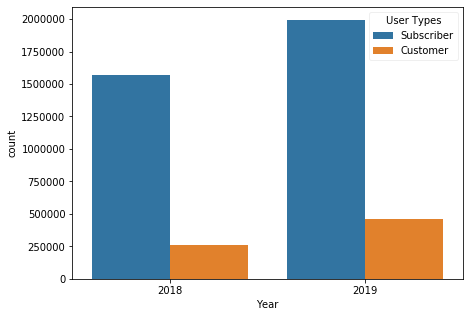

In [33]:
# Compare the Number of Subscribers and Customers in each year.
plt.figure(figsize =[7,5])
ax = sns.countplot(data = bike_df, x = 'Year', hue = 'user_type')
ax.legend(framealpha = 0.3, title ='User Types')

> **Findings:** In both years, the number of uses by subscribers is much more than by customer type of users. First, this indicates that most rents are generated by subscriber type of users. However, we are not sure whether subscribers rent a bike more often than usual customers, since we do not know how many unique subscribers and customers are involved in this dataset. Second, we can also notice that both types of users more utilize the rental bike system in 2019, in comparison to the previous year. This fact is consistent with the finding in 3-1 "The number of rental bike records in each year".

### 3. The Comparison of Accessing Methods based on User Types

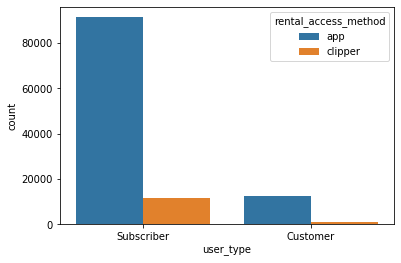

In [34]:
bike_19=bike_df.query('Year == "2019"')
sns.countplot(data = bike_19, x = 'user_type', hue = 'rental_access_method')

> **Findings:** Additionally, I figured out that which methods the subscribers and customers use to access the rental bike. This information is not collected in 2018, so I only compare between the user types and rental access methods within the 2019 dataset. Both types of users mostly access to the system using the mobile application of "Ford GoBike". Thus, the company should carefully pay attention to its application maintenance. 

### 4. Trip Patterns between User Types

#### 4-1 Trip duration of each user type

In [35]:
bike_df.groupby(['user_type'])['duration_sec'].mean()

user_type
Customer      1007.263696
Subscriber     618.999220
Name: duration_sec, dtype: float64

In [36]:
bike_sample.groupby(['user_type'])['duration_sec'].mean() # The sample represents well its original dataset.

user_type
Customer      1020.207317
Subscriber     616.113038
Name: duration_sec, dtype: float64

Text(0, 0.5, 'Trip Duration (sec)')

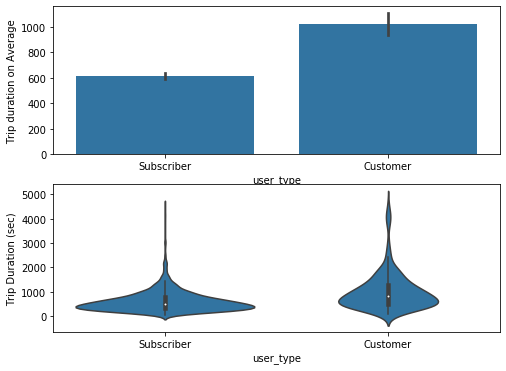

In [37]:
plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
sns.barplot(data = bike_sample, x = 'user_type', y = 'duration_sec',color = base_color)
plt.ylabel('Trip duration on Average')

plt.subplot(2,1,2)
sns.violinplot(data = bike_sample, x = 'user_type', y = 'duration_sec' , color = base_color);
plt.ylabel('Trip Duration (sec)')

> **Findings:** The average trip durations of subscribers are smaller than that of customers. Trips by subscribers take about 600 seconds (ca. 10minutes) on average. On the other hand, the average trip duration by customers is around 1000 seconds (ca. 16.67 minutes). Furthermore, as you can see from the violin plot, the peak of distribtion in "Subsciber" category is much sharper. This implies that the trip duration patterns of subscribers are more likely to have low variance, comparing to the customer group.

#### 4-2 Trip distiance of each user type

In [38]:
bike_sample.groupby(['user_type'])['distance'].mean()

user_type
Customer      1.709975
Subscriber    1.604818
Name: distance, dtype: float64

Text(0, 0.5, 'Trip Distance (km)')

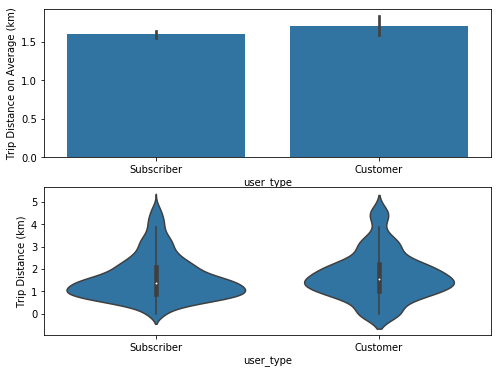

In [39]:
plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
sns.barplot(data = bike_sample, x = 'user_type', y = 'distance', color = base_color);
plt.ylabel('Trip Distance on Average (km)')

plt.subplot(2,1,2)
sns.violinplot(data = bike_sample, x = 'user_type', y = 'distance' , color = base_color);
plt.ylabel('Trip Distance (km)')

> **Findings:** The average trip distance of subscribers seems a little bit shorter than that of customers. However, the difference appears very trivial. The average trip distance in subscriber and customer user group is about 1.54km and 1.64km, respectively. Although the violin plot of Subscriber category seems wider, the sharpness of the peak in both plots seems very similar. To check out whether the difference is statistically and also practically significant, we need to conduct statistical test. However, to put it more simple, this implies that the trip distance patterns of both group are very much similar. 

### 5. The Relationship between Duration and Distance

In [40]:
bike_df[['duration_sec','distance']].describe()

,duration_sec,distance
count,4.283709e+06,4.283709e+06
mean,6.846308e+02,1.611877e+00
std,5.202523e+02,9.702535e-01
min,6.000000e+01,0.000000e+00
25%,3.510000e+02,8.980624e-01
50%,5.550000e+02,1.406149e+00
75%,8.550000e+02,2.143716e+00
max,4.683000e+03,4.968373e+00


Text(0, 0.5, 'Trip Distance (km)')

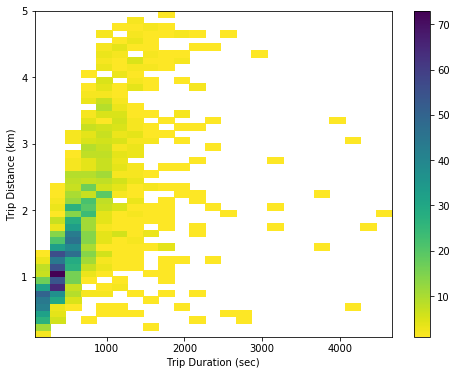

In [41]:
bike_mod = bike_sample.query(' distance> 0.1') 
plt.figure(figsize=[8,6])
bins_dur = np.arange(70, bike_mod.duration_sec.max() + 200, 200)
bins_dis = np.arange(0.1, 5+ 0.1, 0.1)
plt.hist2d(data = bike_mod, x = 'duration_sec', y = 'distance',
           bins = [bins_dur, bins_dis], cmap = 'viridis_r', cmin = 0.3)
plt.colorbar();
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Trip Distance (km)')

In [42]:
corr_= bike_df.duration_sec.corr(bike_df.distance).round(3)
print ('Correlation between trip distance and duration: ', corr_)

Correlation between trip distance and duration:  0.467


> **Findings:** As the last section of bivariate exploration, I investigate the relationship between trip duration and distance. It turns out that travel duration time is positively correlated with travel distance. The correlation coefficient is 0.463.

### Insights from Bivariate Exploration

> - The distributions of trip durations and trip distance are very similar in each year. Almost of all users use the rental bikes less than 2000 seconds (about 33 mintues) and the most of trip distance are short than 4 kilometers(The figures are simply based on the x-axis labels). The number of trips that both subscribers and customers rent a bike is increased from 2018 to 2019.
> - Both types of users mostly access to the system using apps, rather than clippers. 
> - The average trip duration of customer user type is higher than that of subscriber user type. When we look at the violin plots, we can also find out the data points of subscribers are highly concentrated around the median value. However, There is no notable difference on trip distance between the two user groups. 
> - Finally, I found out that trip duration is postively correlated with the trip distance in general. 

### Interesting Relationships between the other Features 
> - One interesting finding from the bivariate exploration is that the more subscribers rent a bike than customers. On the other hand, subscribers' average duration trip time is less than the customer group. In other words, although the customer user group use the rental bike system less often, but they use the bike longer period of time than subscribers. 

## Multivariate Exploration

> As an extension of the previous analysis, I compared the overall patterns of trip between user groups. In this part, the patterns are mainly compared within different time dimensions. 


### 1. Trip Pattern Comparison between User Groups in each Month

#### 1-1 Number of trips in each month

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


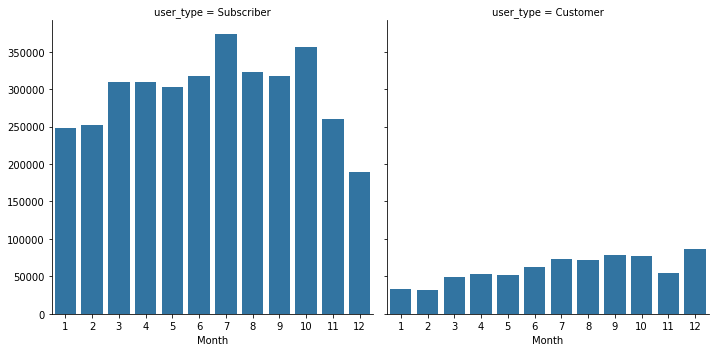

In [43]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.countplot, "Month");
g.add_legend()
plt.show()

> **Findings:** As expected, the number of trips that subscribers take is higher than customers over the months. Since more than 80% of whole users are subscribers, the bar chart of subscribers are highly similar to the previous overall graph (3-2 number of rental bike records in each month) in the univarate section.

#### 1-2 Average trip duration in each month

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


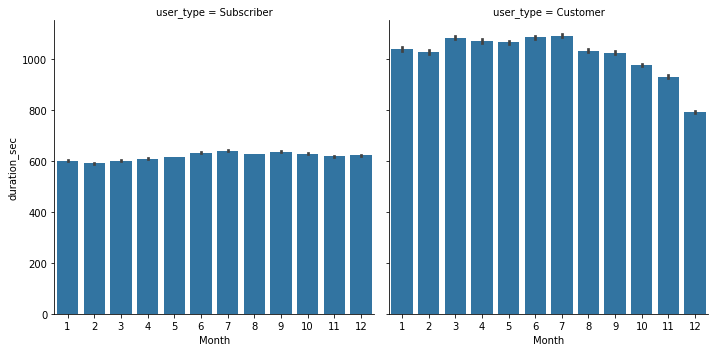

In [44]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.barplot,'Month', 'duration_sec', color = base_color);
g.add_legend();
plt.show();

> **Findings:** Interestingly, the average trip duration of subscriber group is ca. 600 seconds (10 minutes) across all the months. The average trip durations of customers slightly vary, but the duration is always longer than that of subscribers in each month. 

### 2. Trip Pattern Comparison between User Groups in each Weekday

#### 2-1 Number of trips in each weekday

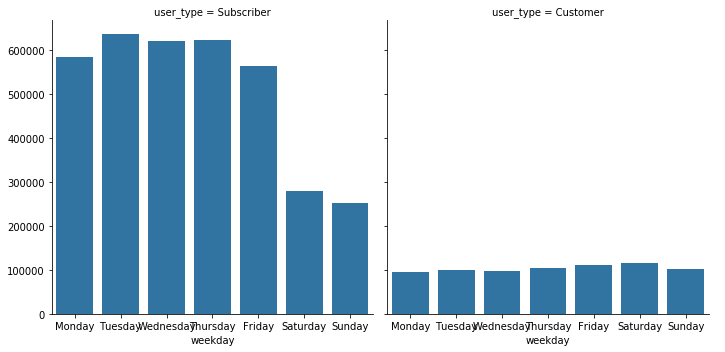

In [45]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
weekday_ord=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = g.map(sns.countplot, "weekday", order = weekday_ord );
g.add_legend()
plt.show()

> **Findings:** Since the majority of the users are subscribers, the bar chart of subscribers are highly similar to the previous overall graph in the univarate section. Subscribers rent bikes more on weekdays than on weekends. For this reason, I expect that the subscribe group is very likely to the group of commuters. On the other hand, the number of trips taken by customer group is very simliar across the weekdays. It seems that there is no notable differences between on weekdays and on weekends. Therefore, we can imply that the chracteristic of customer group might be highly different from that of subscriber group. 

#### 2-2 Average trip duration in each weekday

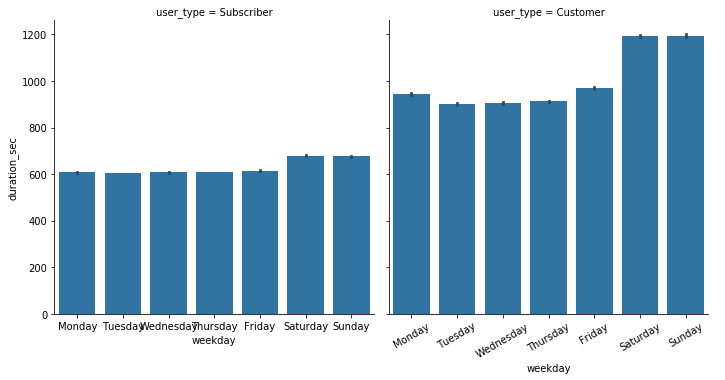

In [46]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
weekday_ord=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = g.map(sns.barplot,'weekday', 'duration_sec', color = base_color, order =weekday_ord);
plt.xticks(rotation = 30)
g.add_legend()
plt.show()

> **Findings:** These two barcharts in this section show the average trip duration between the user groups in each weekday. The average trip time of subscribers is ca. 600 seconds (10 minutes). Also the average trip duration of customers is longer than that of subscribers over the weekdays. These findings are consistent with those of monthly based subscribers' trip duration graph. However, in both groups, the average trip duration on weekends is longer than the trip time on weekdays, although the the difference in the customer group is larger. 

### 3. Trip Pattern Comparison between User Groups in each Hour

#### 3-1 Number of trips in each hour

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


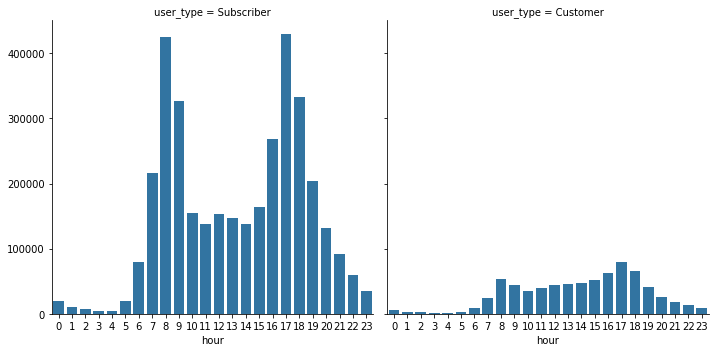

In [47]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.countplot, "hour");
g.add_legend()
plt.show()

> **Findings:** Since most of the users are subscribers, the hour-based bar chart of subscribers are highly similar to the previous overall graph in the univarate section. This fact supports my opinion that the group of subscribers are very likely to be commuters. Commuters usually works on weekdays and their travel path are very likely to be equal over the weekdays. Also, during the rush hours, commuters are highly crowded on the street. The distribution of the group in customer group seems very similar to subscriber groups. Both distributions are bimodel. However the peaks are not remarkable. 

#### 3-2 The average trip duration in each hour

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x432 with 0 Axes>

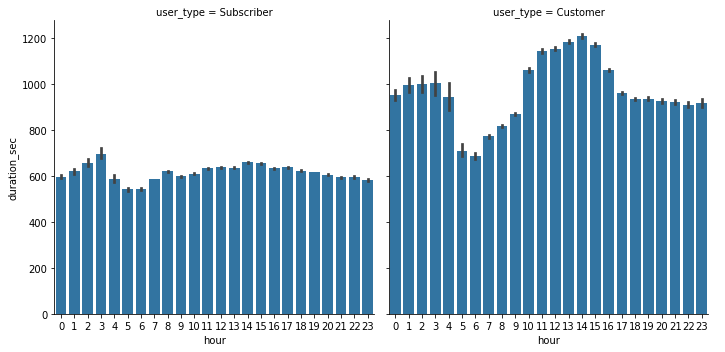

In [48]:
plt.figure(figsize=[10,6])
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.barplot,'hour', 'duration_sec', color = base_color);
g.add_legend()
plt.show()

> **Findings:**  These two barcharts in this section show the average trip duration between the user groups in each hour. The average trip time of subscribers is around 600 seconds (10 minutes), after the morning rush hour. The average trip duration of customers is longer than that of subscribers in each hour. Although the variation is slightly larger than monthly or weekly bar plots, these findings are consistent with the earlier findings. 

### Findings from Multivariate Exploration

>  In the previous section (Bivariate Exploration), I compared the overall patterns of bike trip between the subscriber and customer groups. As an extension of the previous analysis in this part, the patterns are mainly compared within different time dimensions. 
1. **Monthly based Analysis:**  The number of trips that subscribe group monthly takes is much more than that of customer group. As expected, the average trip duration of subscribers are very uniformly distributed and also much less than that of customers. Since subscribers consist of the majoritly of users, the average trip duration of subscribers are very much similar across the months.  
2. **Weekly based Analysis:** The users in subscribe group mostly rent a bike during weekdays. The number of trips in this group on weekends is far less than on weekdays. For these reasons, I guess the most subscriber group has the characteristic of commuters, who regularly need a rental bike as the means of transportation for a certain distance to move from one place to another. On the other hand, there is almost no variation on the number of trips in customer groups. As before, the average trip duration of subscribers is less than that of customers. The customers are more likely ride a bike for a longer time on weekends. 
3. **Hourly based Analysis:** The subscribers show high demands during the rush hours of day. As we discussed, around 8:00 in the morning and around 17:00 in the afternoon are the peak time zones that subscribers take the rental bikes. On the other hand, customers use the rental bikes in the afternoon rather than in the morning. The trip durations of subscriber group are very similar over the hours. 
